In [1]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob.classifiers import NaiveBayesClassifier

from helpers import *
%matplotlib inline

# Fake news detector from headlines

Most of the time we have to deal with a great amount of news that try to be "catchy" from their title or headline but they eventually reveal themselves as false or barely reliable. We can try to train a model to detect fake news from headlines.

## Data loading and preparation

In [2]:
## Define paths
DATA_FOLDER = './data/'
TRAIN_PATH = DATA_FOLDER + 'train.tsv'
TEST_PATH = DATA_FOLDER + 'test.tsv'
VALID_PATH = DATA_FOLDER + 'valid.tsv'

In [3]:
CLEAN_TRAIN = DATA_FOLDER + "train_clean.txt"
CLEAN_TEST = DATA_FOLDER + "test_clean.txt"
CLEAN_VALID = DATA_FOLDER + "valid_clean.txt"

In [4]:
# Loading data from politifact

pol_train_set = pd.read_pickle("data/train_politifact")
pol_test_set = pd.read_pickle("data/test_politifact")
pol_valid_set = pd.read_pickle("data/valid_politifact")

train_hd = pol_train_set[["id", "ruling_headline"]]
test_hd = pol_test_set[["id", "ruling_headline"]]
valid_hd = pol_valid_set[["id", "ruling_headline"]]

In [5]:
# Loading data and convert labels in "dummy scale"

train_data = load_data(TRAIN_PATH)
test_data = load_data(TEST_PATH)
valid_data = load_data(VALID_PATH)

train_data.label = convert_label(train_data)
test_data.label = convert_label(test_data)
valid_data.label = convert_label(valid_data)

In [6]:
# Merging with the liar dataset and taking labels

train_data["id_clean"] = train_data.ID.str[:-5]
train_data.id_clean = pd.to_numeric(train_data.id_clean)

test_data["id_clean"] = test_data.ID.str[:-5]
test_data.id_clean = pd.to_numeric(test_data.id_clean)

valid_data["id_clean"] = valid_data.ID.str[:-5]
valid_data.id_clean = pd.to_numeric(valid_data.id_clean)

train_hd = train_hd.merge(train_data, left_on="id", right_on="id_clean")[["ruling_headline", "label"]]
test_hd = test_hd.merge(test_data, left_on="id", right_on="id_clean")[["ruling_headline", "label"]]
valid_hd = valid_hd.merge(valid_data, left_on="id", right_on="id_clean")[["ruling_headline", "label"]]

## Data exploration

In [7]:
# Dimension of the data

# Train
print("Train data dimension:", train_hd.shape[0])

# Test
print("Test data dimension:", test_hd.shape[0])

# Validation
print("Validation data dimension:", valid_hd.shape[0])

Train data dimension: 10238
Test data dimension: 1266
Validation data dimension: 1284


In [8]:
# Mean of the number of words per headline

# Train
print("Train set, average ruling_headline length in words:", np.mean(train_hd.ruling_headline.str.split().str.len()))

# Test
print("Test set, average ruling_headline length in words:", np.mean(test_hd.ruling_headline.str.split().str.len()))

# Validation
print("Validation set, average ruling_headline length in words:", np.mean(valid_hd.ruling_headline.str.split().str.len()))

Train set, average ruling_headline length in words: 12.344207853096307
Test set, average ruling_headline length in words: 12.268562401263823
Validation set, average ruling_headline length in words: 12.29595015576324


In [9]:
# Median of the number of words per headline

# Train
print("Train set, median value of the ruling_headline length in words:", np.median(train_hd.ruling_headline.str.split().str.len()))

# Test
print("Test set, median value of the ruling_headline length in words:", np.median(test_hd.ruling_headline.str.split().str.len()))

# Validation
print("Validation set, median value of the ruling_headline length in words:", np.median(valid_hd.ruling_headline.str.split().str.len()))

Train set, median value of the ruling_headline length in words: 12.0
Test set, median value of the ruling_headline length in words: 12.0
Validation set, median value of the ruling_headline length in words: 12.0


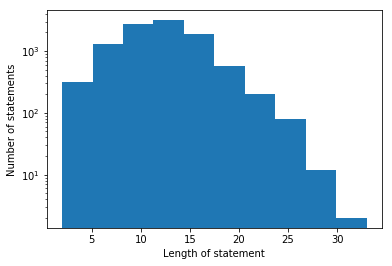

In [10]:
# Distribution of the lengths of the statements

# Train
plot_length_statement_distr(train_hd.ruling_headline)

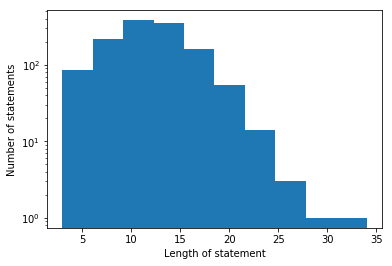

In [11]:
# Test
plot_length_statement_distr(test_hd.ruling_headline)

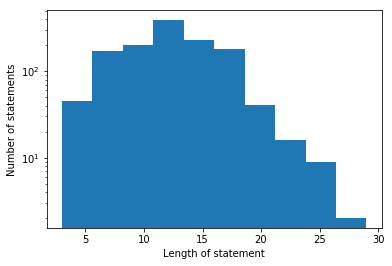

In [12]:
# Validation
plot_length_statement_distr(valid_hd.ruling_headline)

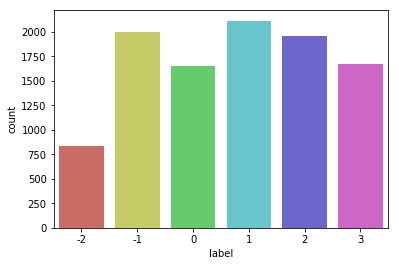

In [13]:
# Label distribution

# Train
plot_label_distribution(train_hd)

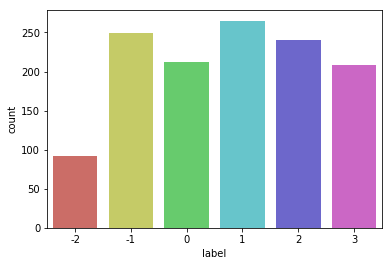

In [14]:
# Test
plot_label_distribution(test_hd)

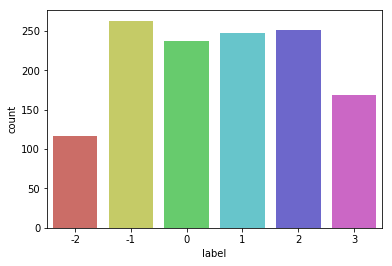

In [15]:
# Validation
plot_label_distribution(valid_hd)

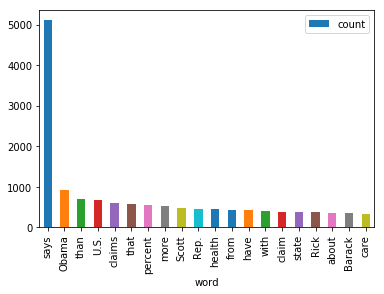

In [16]:
# Word frequencies (words shorter than 3 excluded)

# Train
plot_freq_word(train_hd.ruling_headline)

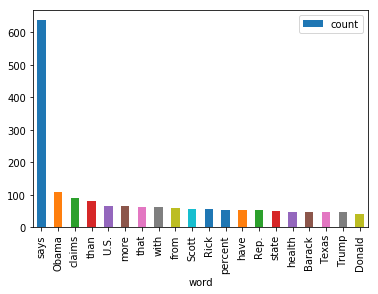

In [17]:
# Test
plot_freq_word(test_hd.ruling_headline)

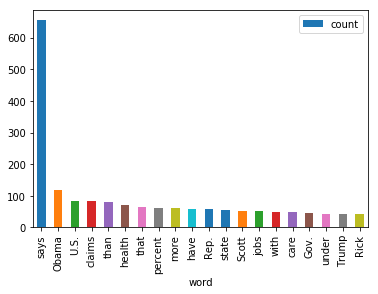

In [18]:
# Validation
plot_freq_word(valid_hd.ruling_headline)

## Data preprocessing

In [19]:
# Cleaning text data
clean_train_df = clean_data(train_hd, "ruling_headline")
clean_test_df = clean_data(test_hd, "ruling_headline")
clean_valid_df = clean_data(valid_hd, "ruling_headline")

## NLTK Naive Bayes

We ran different classifiers but the one who provided the best performance for our model was the NLTK Naive Bayes, so we will focus on it.

In [20]:
# Converting dataframes to list of tuples
hd_list_tr = convertToTupleList(clean_train_df)
hd_list_te = convertToTupleList(clean_test_df)
hd_list_va = convertToTupleList(clean_valid_df)

In [21]:
nltk_classifier = train_NLTK_NB(hd_list_tr)

In [24]:
test_set = test_NLTK_NB(hd_list_te, nltk_classifier)

Accuracy:  0.252827140549273


In [25]:
nltk_classifier.show_most_informative_features()

Most Informative Features
                    pant = True               -2 : 1      =     63.0 : 1.0
                   wrong = True               -2 : 2      =     33.5 : 1.0
                   chain = True               -2 : 1      =     27.0 : 1.0
                 correct = True                3 : 0      =     26.7 : 1.0
                 wrongly = True               -2 : 1      =     24.3 : 1.0
                  mostly = True                2 : 3      =     23.0 : 1.0
               socialist = True               -2 : -1     =     19.8 : 1.0
                   email = True               -2 : 3      =     19.7 : 1.0
                limbaugh = True               -2 : 2      =     17.9 : 1.0
                 michele = True               -2 : 3      =     17.9 : 1.0


In [27]:
nltk_classifier.most_informative_features(30)

[('pant', True),
 ('wrong', True),
 ('chain', True),
 ('correct', True),
 ('wrongly', True),
 ('mostly', True),
 ('socialist', True),
 ('email', True),
 ('limbaugh', True),
 ('michele', True),
 ('viral', True),
 ('false', True),
 ('fire', True),
 ('wont', True),
 ('blogger', True),
 ('bachmann', True),
 ('zero', True),
 ('repeat', True),
 ('falsely', True),
 ('takeover', True),
 ('ridiculous', True),
 ('evidence', True),
 ('post', True),
 ('suggests', True),
 ('photo', True),
 ('muslim', True),
 ('detail', True),
 ('quote', True),
 ('sex', True),
 ('cite', True)]

In [28]:
probs = nltk_classifier.classify_many([fs for (fs, l) in test_set])

In [29]:
from nltk.metrics import ConfusionMatrix
cm = ConfusionMatrix(probs, clean_test_df.label.values)
print(cm)

   |  -  -  -  -                      |
   |  4  3  2  1  0  1  2  3  4  5  6 |
---+----------------------------------+
-4 | <.> .  .  .  .  .  .  .  .  .  . |
-3 |  . <.> .  .  .  .  .  .  .  .  . |
-2 |  .  .<15>21 15 10  5  7  .  .  . |
-1 |  .  . 29<65>50 53 33 37  .  .  . |
 0 |  .  .  9 30<42>27 33 21  .  .  . |
 1 |  .  . 18 58 59<72>44 38  .  .  . |
 2 |  .  . 12 30 21 52<59>39  .  .  . |
 3 |  .  .  9 39 22 46 58<60> .  .  . |
 4 |  .  .  .  .  .  .  .  . <.> .  . |
 5 |  .  .  .  .  .  .  .  .  . <.> . |
 6 |  .  .  .  .  .  .  .  .  .  . <.>|
---+----------------------------------+
(row = reference; col = test)



## TextBlob Naive Bayes

In [233]:
tb_classifier = NaiveBayesClassifier(hd_list_tr)

In [234]:
tb_classifier.accuracy(hd_list_te)

0.2456556082148499

## Sklearn classifiers

In [21]:
# Save text data to be processed
save_data(clean_train_df, "ruling_headline", CLEAN_TRAIN)
save_data(clean_test_df, "ruling_headline", CLEAN_TEST)
save_data(clean_valid_df, "ruling_headline", CLEAN_VALID)

In [22]:
# Now the scripts to create word embeddings must be ran

In [24]:
# Get text features
train_feat = getFeatures(CLEAN_TRAIN)
test_feat = getFeatures(CLEAN_TEST)
valid_feat = getFeatures(CLEAN_VALID)

In [25]:
# Splitting data and get labels
train_data, train_labels = shuffle(np.array(train_feat), clean_train_df.label.values)
test_data, test_labels = shuffle(np.array(test_feat), clean_test_df.label.values)
valid_data, valid_labels = shuffle(np.array(valid_feat), clean_valid_df.label.values)

### Random forest

In [26]:
probs = train_RF(train_data, train_labels, test_data, test_labels)

0.19305331179321486


array([3, 0, 1, ..., 1, 0, 1])

### Logistic regression

In [27]:
probs = train_LR(train_data, train_labels, test_data, test_labels)

0.21647819063004847


array([ 2,  2,  1, ...,  0,  1, -1])

### Support vector machine

In [29]:
probs = train_SVM(train_data, train_labels, test_data, test_labels)

0.22132471728594508


/home/mikanikos/anaconda3/envs/ada/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([ 2,  2,  1, ...,  0,  1, -1])